<a href="https://colab.research.google.com/github/alberttuwan1/News_Category_Classification/blob/main/Text_Mining_Midterm_Exam_2502001353_Albert_Gabriel_Tuwan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Albert Gabriel Tuwan<br>
NIM: 2502001353<br>
Class: LA05<br>
Subject: Text Mining

#6.
Memaparkan penjelasan tentang semua step dan proses yang anda lakukan dalam sebuah video

Link video: https://youtu.be/ggAcpbpJsi8

#Prequesities

In [ ]:
!pip install newspaper3k
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=d37d3262a98f710ef4a0e3a38ec81760f57b62dd6f265185f24648e9c93ba15f
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=9026b4038b699df4889afae9fb2cce9747aa25f82ad6a8b545768c513cccee2c
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

#Case Study
Anda adalah seorang data scientist di sebuah lembaga riset yang memiliki tugas untuk membuat model
klasifikasi multiclass text. Namun anda tidak memiliki data sehingga untuk membangun model klasifikasi
text, anda perlu untuk melakukan beberapa hal berikut:


# Library and Constant

In [ ]:
# Constant
SEED = 42

# News Scrapping and Data
import pandas as pd
from newspaper import build, Article
import numpy as np
np.random.seed(SEED)

# NLP Preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # Stemming Bahasa Indonesia

# Data Splitting
from sklearn.model_selection import train_test_split as tts

# Word Representation
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import Word2Vec

# Machine Learning Model
from sklearn.svm import SVC #SVM Model
from sklearn.ensemble import RandomForestClassifier as rf # Random Forest

# Performance
from sklearn.metrics import classification_report as cr

# Hyperparamter Tuning
from sklearn.model_selection import GridSearchCV as GS

# Miscellaneous
pd.set_option('display.max_columns', None)

from google.colab import data_table
data_table.enable_dataframe_formatter()
from google.colab import files

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#1.
Mengumpulkan data teks berita dengan menggunakan metode web scrapping **minimal total 100** data teks berita yang berasal dari media digital seperti liputan 6, detik.com dan lain-lain dengan kategori berita **politik, olahraga, bisnis, dan hiburan**. Data ini harus berasal minimal dari 3 media yang berbeda dan anda juga perlu melakukan pelabelan. Contoh Format data: <br>
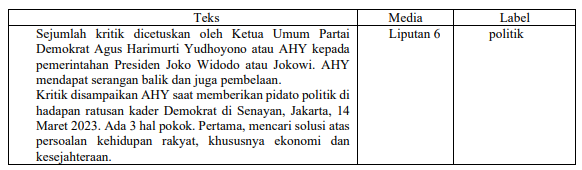

## Web Scrapping

Untuk mendapatkan data teks berita saya menggunakan function build() dan Article() dari library newspaper. build() digunakan untuk mendapatkan semua hyperlink yang berada pada webpage tertentu, sedangkan Article() digunakan untuk mendapatkan berbagai macam  informasi dari suatu berita, seperti judul, penulis, teks berita, dan lainnya.<br><br>

Pertama-tama saya mengumpulkan semua webpage dari berbagai media yang setiap webpage tersebut mengandung berita dari kategori tertentu.

In [ ]:
media = []

# Media Okezone
media.append(['Okezone', 'politik', 'https://nasional.okezone.com/'])
media.append(['Okezone', 'olahraga', 'https://sports.okezone.com/'])
media.append(['Okezone', 'bisnis', 'https://economy.okezone.com/'])
media.append(['Okezone', 'hiburan', 'https://celebrity.okezone.com/'])

# Media Kompas
media.append(['Kompas', 'politik', 'https://news.kompas.com/'])
media.append(['Kompas', 'olahraga', 'https://olahraga.kompas.com/'])
media.append(['Kompas', 'bisnis', 'https://money.kompas.com/'])
media.append(['Kompas', 'hiburan', 'https://entertainment.kompas.com/'])

# Media Detik
media.append(['Detik', 'politik', 'https://news.detik.com/berita'])
media.append(['Detik', 'olahraga', 'https://sport.detik.com/'])
media.append(['Detik', 'bisnis', 'https://finance.detik.com/'])
media.append(['Detik', 'hiburan', 'https://hot.detik.com/'])

for i in media:
  print(i)

['Okezone', 'politik', 'https://nasional.okezone.com/']
['Okezone', 'olahraga', 'https://sports.okezone.com/']
['Okezone', 'bisnis', 'https://economy.okezone.com/']
['Okezone', 'hiburan', 'https://celebrity.okezone.com/']
['Kompas', 'politik', 'https://news.kompas.com/']
['Kompas', 'olahraga', 'https://olahraga.kompas.com/']
['Kompas', 'bisnis', 'https://money.kompas.com/']
['Kompas', 'hiburan', 'https://entertainment.kompas.com/']
['Detik', 'politik', 'https://news.detik.com/berita']
['Detik', 'olahraga', 'https://sport.detik.com/']
['Detik', 'bisnis', 'https://finance.detik.com/']
['Detik', 'hiburan', 'https://hot.detik.com/']


Kemudian, untuk setiap webpage tersebut, saya mengambil link berita dengan menggunakan function build(). Fungsi build ini berguna untuk 'membuild' source berita kita, seperti categories, feeds, articles, brand, dan description 'memoize_articles = False' memastikan bahwa bahwa article yang sama akan dibuild lagi pada ekstraksi selanjutnya.

Setelah dicek hasilnya, ternyata pada beberapa link berita awal adalah link umum yang tidak ada hubungannya dengan kategori yang dicari, oleh karena itu bisa dilewat. Selain itu, ternyata pada bagian pertengahan ternyata ada link berita yang juga tidak ada hubungannya dengan yang dicari, misalnya ada link video yang tidak ada isi teksnya di media Okezone dan Kompas.

Untuk setiap media dan setiap kategori, akan diambil masing-masing 15 berita (total 180). Hal ini bertujuan supaya data berita lebih dari yang diminta dan jika misal ditemukan ada berita yang tidak valid, kita masih ada data cadangan.

In [ ]:
df = pd.DataFrame({
    'URL': [],
    'Teks': [],
    'Media': [],
    'Label': []
})

for i in media:
  article = build(url = i[2], memoize_articles = False, language = 'id')
  count = 0
  for art in article.articles:
    if(count == 15):
      break
    elif (re.search(f"^{i[2]}.+$", art.url)):
      count = count + 1
      news = Article(art.url)

      # Make sure the webpages exist
      try:
        news.download()
        news.parse()
      except:
        count = count - 1
        continue

      # Make sure there is a text in it
      if news.text == '':
        count = count - 1
        continue
      temp_df = {
          'URL': art.url,
          'Teks': news.text,
          'Media': i[0],
          'Label': i[1]
      }
      df = df._append(temp_df, ignore_index = True)


# for i in media:
#   article = build(url = i[2], memoize_articles = False, language = 'id')
#   if(i[0] == 'Okezone'):
#     count = 0
#     for art in article.articles[8:]:
#       if ('video.okezone.com' in art.url):
#         continue
#       if(count == 15):
#         break
#       count = count + 1
#       news = Article(art.url)
#       news.download()
#       news.parse()
#       temp_df = {
#           'URL': art.url,
#           'Teks': news.text,
#           'Media': i[0],
#           'Label': i[1]
#       }
#       df = df._append(temp_df, ignore_index = True)
#   elif(i[0] == 'Kompas'):
#     count = 0
#     for art in article.articles[5:]:
#       if ('kgnow.com/watch' in art.url or 'https://www.kompas.com/food/gallery' in art.url):
#         continue
#       if(count == 15):
#         break
#       count = count + 1
#       news = Article(art.url)
#       news.download()
#       news.parse()
#       temp_df = {
#           'URL': art.url,
#           'Teks': news.text,
#           'Media': i[0],
#           'Label': i[1]
#       }
#       df = df._append(temp_df, ignore_index = True)
#   else:
#       for art in article.articles[5:20]:
#         news = Article(art.url)
#         news.download()
#         news.parse()
#         temp_df = {
#             'URL': art.url,
#             'Teks': news.text,
#             'Media': i[0],
#             'Label': i[1]
#         }
#         df = df._append(temp_df, ignore_index = True)

CRITICAL:newspaper.network:[REQUEST FAILED] HTTPSConnectionPool(host='index.okezone.com', port=443): Read timed out. (read timeout=7)
CRITICAL:newspaper.network:[REQUEST FAILED] 404 Client Error: Not Found for url: https://nasional.okezone.com/feeds
CRITICAL:newspaper.network:[REQUEST FAILED] 500 Server Error: Internal Server Error for url: https://nasional.okezone.com/feed
CRITICAL:newspaper.network:[REQUEST FAILED] 500 Server Error: Internal Server Error for url: https://nasional.okezone.com/rss
CRITICAL:newspaper.network:[REQUEST FAILED] 500 Server Error: Internal Server Error for url: https://sports.okezone.com/feed
CRITICAL:newspaper.network:[REQUEST FAILED] 404 Client Error: Not Found for url: https://sports.okezone.com/feeds
CRITICAL:newspaper.network:[REQUEST FAILED] 500 Server Error: Internal Server Error for url: https://sports.okezone.com/rss
CRITICAL:newspaper.network:[REQUEST FAILED] 500 Server Error: Internal Server Error for url: https://economy.okezone.com/rss
CRITICAL:

In [ ]:
df

Mendownload data supaya meskipun webpage tempat kita mendapat berita isinya berubah, data kita tidak berubah sehingga kita bisa membandingkan approach-approach berbeda karena datanya sudah pasti sama.

In [ ]:
df.to_csv("raw data.csv", index = False)
files.download("raw data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#2.
Melakukan text preprocessing seperti cleansing, tokenization, filtering dan anda dapat menambahkan stemming atau lemmatization jika diperlukan. Sediakan hasil cleansing dalam 1 kolom terpisah sehingga anda memiliki table sebagai berikut:<br>
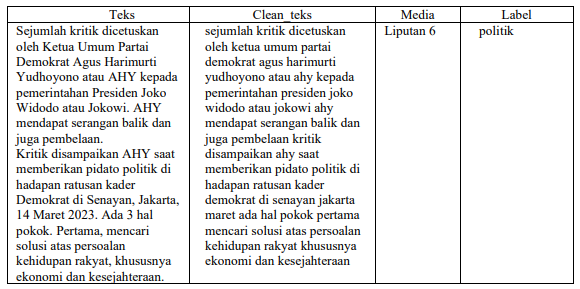

In [ ]:
# Read data yang sudah di download tadi
# df = pd.read_csv('raw data.csv')
# df

## Preporcessing

In [ ]:
# Data Information
df.info()
df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     138 non-null    object
 1   Teks    138 non-null    object
 2   Media   138 non-null    object
 3   Label   138 non-null    object
dtypes: object(4)
memory usage: 4.4+ KB


,URL,Teks,Media,Label
count,138,138,138,138
unique,138,136,3,4
top,https://nasional.okezone.com/read/2024/04/29/3...,JAKARTA - Mahalini dan Rizky Febian santer dik...,Okezone,bisnis
freq,1,2,60,45


In [ ]:
# Drop missing value and duplicated data
df_clean = df.copy()
df_clean = df_clean.drop(['URL'], axis = 1)
df_clean.dropna(inplace = True) # Jika me-read data dengan mendownload baru di read lagi
df_clean = df_clean[df_clean['Teks'] != ''] # Jika langsung dari Article()
df_clean.drop_duplicates(subset = ['Teks'], inplace = True)

In [ ]:
df_clean['Media'].value_counts()

Media
Detik      60
Okezone    58
Kompas     18
Name: count, dtype: int64

In [ ]:
df_clean['Label'].value_counts()

Label
bisnis      45
hiburan     32
politik     30
olahraga    29
Name: count, dtype: int64

Ada data yang dibuang yaitu data dengan kategori olahraga dan hiburan dari media Okezone dan Kompas

## Text cleansing

Pada bagian ini saya akan mengubah semua uppercase menjadi lowercase, membuang semua character non-alphabet, membuang multiple whitespace, removing stopword, dan stemming.

Stemming dilakukan dengan menggunakan function StemmerFactory() dari library Sastrawi. Library ini bisa digunakan untuk stemming kata bahasa Indonesia.

Teks yang sudah dibersihkan kemudian dimasukkan ke dataframe dengan kolom baru 'Clean_teks'

In [ ]:
def tekt_cleansing(text):
  # Lower all case
  text = text.lower()

  # non-alphabet character removal
  text = re.sub('[^a-z]', ' ', text)

  # Remove multiple whitespace
  text = ' '.join(text.split())

  #Stopwords Removal
  sw =  set(stopwords.words('indonesian'))
  text = text.split()
  text = [txt for txt in text if txt not in sw]

  #Stemming
  fac = StemmerFactory()
  stemmer = fac.create_stemmer()
  text = [stemmer.stem(txt) for txt in text]

  return ' '.join(text)

df_nlp = df_clean.copy()
df_nlp['Clean_teks'] = df_clean['Teks'].apply(tekt_cleansing)
df_nlp = df_nlp[['Teks', 'Clean_teks', 'Media', 'Label']]

In [ ]:
df_nlp

,Teks,Clean_teks,Media,Label
0,JAKARTA - Menteri Koordinator Bidang Pembangun...,jakarta menteri koordinator bidang bangun manu...,Okezone,politik
1,JAKARTA - Gunung Semeru mengalami erupsi pagi ...,jakarta gunung meru alami erupsi pagi senin wi...,Okezone,politik
2,JAKARTA - Badan Meteorologi Klimatologi dan Ge...,jakarta badan meteorologi klimatologi geofisik...,Okezone,politik
3,"JAKARTA - Pakar Hukum Tata Negara, Mahfud MD t...",jakarta pakar hukum tata negara mahfud md kome...,Okezone,politik
4,JAKARTA - Badan Geologi Kementerian Energi dan...,jakarta badan geologi menteri energi sumber da...,Okezone,politik
...,...,...,...,...
133,"Harvey Moeis, suami Sandra Dewi, masih ditahan...",harvey moeis suami sandra dewi tahan rutan kej...,Detik,hiburan
134,Chicco Jerikho pernah mengalami sepsis usai me...,chicco jerikho alami sepsis idap covid saking ...,Detik,hiburan
135,Pasangan selebritas Tri Suaka dan Nabila Mahar...,pasang selebritas tri suaka nabila maharani ni...,Detik,hiburan
136,Presenter sekaligus pelawak Mpok Alpa (37) ten...,presenter lawak mpok alpa bahagia kandung mpok...,Detik,hiburan


#3.
Melakukan text representation dengan menggunakan 2 metode, metode pertama adalah metode yang memberikan informasi seberapa penting sebuah kata dalam suatu sample data atau dokumen yang berada dalam kumpulan dataset. Metode kedua adalah metode representasi kata ke dalam suatu set vektor yang menggambarkan penggunaannya dalam konteks, size vektor adalah 50, dan frequency kata yang diperhitungkan minimal 3. Vektor yang dihasilkan harus berdasarkan hasil training dengan input kata dan target output konteks. Jelaskan langkah-langkah yang anda lakukan.

## Data Splitting

Sebelum melakukan text representation, kita perlu melakukkan splitting data sehingga data validation tidak ada leakage ke data training.

In [ ]:
x_train, x_val, y_train, y_val = tts(
    df_nlp['Clean_teks'].apply(lambda x: x.split()),
    df_nlp['Label'],
    test_size = .3,
    random_state = SEED,
    stratify = df_nlp["Label"]
)

##TF-IDF

Untuk mendapatkan informasi seberapa penting sebuah kata dalam suatu sample data atau dokumen yang berada dalam kumpulan dataset, saya menggunakan TF-IDF (Term Frequency-Inverse Document Frequency)

TF adalah frekuensi kemunculan term i pada suatu dokumen j dibagi dengan total term pada dokumen j

Sedangkan IDF sendiri berfungsi untuk mengurangi bobot suatu term jika kemunculannya banyak dan tersebar diseluruh dokumen

Rumus dari TF-IDF adalah <br>
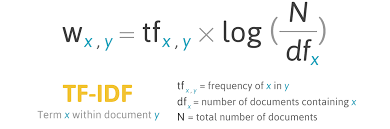

untuk TF-IDF saya menggunakan TfidfVectorizer() dari sklearn. Pada data training, saya menggunakan fit.transofrm() dan pada data validation, saya menggunakan transform() saja. Hal ini dilakukan agar ketika melakukan prediction, datanya hanya berdasarkan data training saja (tidak ada tambahan data baru pada data validation).

In [ ]:
def tfidf_func(text):
    tfidf_vectorizer = TfidfVectorizer(min_df = 3, tokenizer = lambda x : x, lowercase = False)
    tfidf_text = tfidf_vectorizer.fit_transform(text)

    return tfidf_text, tfidf_vectorizer

x_train_tfidf, tfidf = tfidf_func(x_train)
x_train_tfidf = pd.DataFrame(x_train_tfidf.toarray(),
                             columns = tfidf.get_feature_names_out())

x_val_tfidf = pd.DataFrame(tfidf.transform(x_val).toarray(),
                            columns = tfidf.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
x_train_tfidf

a  abdullah     acara  acosta       acu       ada  adaptasi  adik  \
0   0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   0.0   
1   0.000000  0.000000  0.000000     0.0  0.000000  0.067512  0.000000   0.0   
2   0.000000  0.000000  0.000000     0.0  0.000000  0.223051  0.000000   0.0   
3   0.020786  0.020786  0.000000     0.0  0.000000  0.000000  0.000000   0.0   
4   0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   0.0   
..       ...       ...       ...     ...       ...       ...       ...   ...   
90  0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   0.0   
91  0.000000  0.000000  0.108981     0.0  0.000000  0.000000  0.000000   0.0   
92  0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   0.0   
93  0.000000  0.000000  0.000000     0.0  0.050848  0.000000  0.000000   0.0   
94  0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.094778   0.0   

    adil       adu  advertisement  afc    agenda  agung  agus      air  aja  \
0    0.0  0.075719       0.000000  0.0  0.000000    0.0   0.0  0.08743  0.0   
1    0.0  0.000000       0.068972  0.0  0.000000    0.0   0.0  0.00000  0.0   
2    0.0  0.000000       0.000000  0.0  0.000000    0.0   0.0  0.00000  0.0   
3    0.0  0.099683       0.019616  0.0  0.000000    0.0   0.0  0.00000  0.0   
4    0.0  0.000000       0.000000  0.0  0.000000    0.0   0.0  0.00000  0.0   
..   ...       ...            ...  ...       ...    ...   ...      ...  ...   
90   0.0  0.000000       0.000000  0.0  0.000000    0.0   0.0  0.00000  0.0   
91   0.0  0.000000       0.063000  0.0  0.000000    0.0   0.0  0.00000  0.0   
92   0.0  0.000000       0.027618  0.0  0.000000    0.0   0.0  0.00000  0.0   
93   0.0  0.000000       0.000000  0.0  0.000000    0.0   0.0  0.00000  0.0   
94   0.0  0.000000       0.085322  0.0  0.200252    0.0   0.0  0.00000  0.0   

    ajak  ajang  ajar  akan  akbp    akibat  akses  aktivitas  aku      akun  \
0    0.0    0.0   0.0   0.0   0.0  0.000000    0.0   0.000000  0.0  0.036781   
1    0.0    0.0   0.0   0.0   0.0  0.000000    0.0   0.161879  0.0  0.000000   
2    0.0    0.0   0.0   0.0   0.0  0.049275    0.0   0.000000  0.0  0.028125   
3    0.0    0.0   0.0   0.0   0.0  0.016967    0.0   0.000000  0.0  0.000000   
4    0.0    0.0   0.0   0.0   0.0  0.000000    0.0   0.000000  0.0  0.023200   
..   ...    ...   ...   ...   ...       ...    ...        ...  ...       ...   
90   0.0    0.0   0.0   0.0   0.0  0.000000    0.0   0.268842  0.0  0.037700   
91   0.0    0.0   0.0   0.0   0.0  0.000000    0.0   0.000000  0.0  0.000000   
92   0.0    0.0   0.0   0.0   0.0  0.023888    0.0   0.000000  0.0  0.013635   
93   0.0    0.0   0.0   0.0   0.0  0.000000    0.0   0.000000  0.0  0.000000   
94   0.0    0.0   0.0   0.0   0.0  0.000000    0.0   0.000000  0.0  0.000000   

    alam     alami  alas      alat  alex  alfian  alhamdulillah       ali  \
0    0.0  0.000000   0.0  0.000000   0.0     0.0            0.0  0.000000   
1    0.0  0.170011   0.0  0.202535   0.0     0.0            0.0  0.000000   
2    0.0  0.046808   0.0  0.000000   0.0     0.0            0.0  0.200562   
3    0.0  0.000000   0.0  0.000000   0.0     0.0            0.0  0.000000   
4    0.0  0.000000   0.0  0.000000   0.0     0.0            0.0  0.000000   
..   ...       ...   ...       ...   ...     ...            ...       ...   
90   0.0  0.062744   0.0  0.000000   0.0     0.0            0.0  0.000000   
91   0.0  0.000000   0.0  0.000000   0.0     0.0            0.0  0.000000   
92   0.0  0.000000   0.0  0.000000   0.0     0.0            0.0  0.000000   
93   0.0  0.035602   0.0  0.000000   0.0     0.0            0.0  0.000000   
94   0.0  0.000000   0.0  0.000000   0.0     0.0            0.0  0.000000   

    alias      alir  all  allah  alwi  aman      amat     ambil  amerika  \
0     0.0  0.000000  0.0    0.0   0.0   0.0  0.000000  0.068256      0.0   
1     0.0  0.000000  0.0    0.0   0.0   0.0  0.000000  0.000000

## Word2Vec (Skipgram)

Untuk mendapatkan representasi kata ke dalam suatu set vektor yang menggambarkan penggunaannya dalam konteks, size vektor adalah 50, dan frequency kata yang diperhitungkan minimal 3, serta vektor yang dihasilkan harus berdasarkan hasil training dengan input kata dan target output konteks, kita bisa menggunakan Word2Vec Skipgram.

Model skipgram ini bisa dibuat dengan menggunakan Word2Vec dengan sg = 1 dari gensim.models.

Pertama-tama skipgram akan mengambil vektor kata untuk setiap kata pada inputan text kita. Kemudian, kita ambil vocab dan vector dari kata-kata skipgramnya.

Kemudian kita akan menghitung mean/rata-rata dari semua vektor yang sudah diambil tadi untuk menghasilkan vektor baru yang nantinya akan menjadi representasi dari text inputan tadi. Vektor representasi tersebut kemudian dimasukkan ke data frame.

In [ ]:
def word2vec(text, vector_size = 50):
  sgr = Word2Vec(text, min_count = 3,
                 vector_size = vector_size,
                 window = 15,
                 sg = 1)
  vocab = set(sgr.wv.index_to_key)

  return sgr, vocab

sgr, vocab= word2vec(x_train)

x_train_v = []
for i in x_train:
  x_train_v.append(np.array([sgr.wv.get_vector(wrd) for wrd in i if wrd in vocab]))

x_train_w2v_avg = []
for i in x_train_v:
  if len(i) == 0:
    x_train_w2v_avg.append(np.zeros(x_train_v.shape[0], dtype = float))
  else:
    x_train_w2v_avg.append(i.mean(axis = 1))

x_train_w2v = pd.DataFrame(x_train_w2v_avg)

x_val_v = []
for i in x_val:
  x_val_v.append(np.array([sgr.wv.get_vector(wrd) for wrd in i if wrd in vocab]))

x_val_w2v_avg = []
for i in x_val_v:
  if len(i) == 0:
    x_val_w2v_avg.append(np.zeros(50, dtype = float))
  else:
    x_val_w2v_avg.append(i.mean(axis = 0))

x_val_w2v = pd.DataFrame(x_val_w2v_avg)

In [ ]:
print(len(vocab))

1524


In [ ]:
x_train_v[0]

array([[ 4.6043888e-01,  6.1292879e-02,  3.0375281e-01, ...,
        -8.6257115e-02, -3.6064622e-01,  2.3401707e-01],
       [ 3.5531688e-01,  7.6288295e-01,  2.4628484e-01, ...,
        -1.9880223e-01, -5.0209785e-01, -7.6852273e-03],
       [ 1.9150360e-01,  8.2246274e-01,  1.4440839e-01, ...,
        -1.4598808e-01, -1.0257462e-01, -1.4934948e-01],
       ...,
       [ 4.0744711e-04,  6.8921906e-01,  3.0491561e-02, ...,
        -4.0149969e-01, -2.2687884e-01,  3.3134279e-01],
       [-9.2742294e-02,  5.3601551e-01,  5.5831607e-02, ...,
        -3.3022720e-01, -1.8515243e-01,  4.0292740e-01],
       [-2.7333710e-01,  4.3764219e-01, -2.7172351e-02, ...,
        -1.5902553e-01, -1.2438543e-03,  2.2938076e-01]], dtype=float32)

In [ ]:
x_train_w2v_avg

[array([ 0.1603911 ,  0.5159384 ,  0.13825612,  0.25061712,  0.0889698 ,
        -0.30066466,  0.00465383,  0.23776893, -0.14937955,  0.09862255,
         0.02575128, -0.50332433, -0.34402272, -0.38482416, -0.11405542,
        -0.069856  , -0.21697502, -0.36835375, -0.07840341, -0.42557687,
        -0.16707848,  0.23451252, -0.04469895, -0.3624673 ,  0.08407575,
        -0.08510789,  0.0812894 ,  0.38062444, -0.01250966, -0.04748668,
        -0.2603858 , -0.22658637,  0.26204336,  0.30777705, -0.10494404,
         0.17883427, -0.2613054 , -0.2319721 ,  0.52605015, -0.49562442,
         0.2849838 , -0.41920277, -0.23295562,  0.00409592,  0.16754633,
         0.10783894, -0.20473936, -0.16505612, -0.28498748,  0.06364437],
       dtype=float32),
 array([ 0.24589524,  0.02530968, -0.14916623,  0.04914243,  0.03114909,
        -0.15352602, -0.12145353,  0.02696917, -0.16981897, -0.00516201,
        -0.05395077, -0.20914596, -0.08677648, -0.25376365, -0.26907277,
         0.08385805, -0.117

In [ ]:
x_train_w2v

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.160391,0.515938,0.138256,0.250617,0.088970,-0.300665,0.004654,0.237769,-0.149380,0.098623,0.025751,-0.503324,-0.344023,-0.384824,-0.114055,-0.069856,-0.216975,-0.368354,-0.078403,-0.425577,-0.167078,0.234513,-0.044699,-0.362467,0.084076,-0.085108,0.081289,0.380624,-0.012510,-0.047487,-0.260386,-0.226586,0.262043,0.307777,-0.104944,0.178834,-0.261305,-0.231972,0.526050,-0.495624,0.284984,-0.419203,-0.232956,0.004096,0.167546,0.107839,-0.204739,-0.165056,-0.284987,0.063644
1,0.245895,0.025310,-0.149166,0.049142,0.031149,-0.153526,-0.121454,0.026969,-0.169819,-0.005162,-0.053951,-0.209146,-0.086776,-0.253764,-0.269073,0.083858,-0.117083,-0.186299,-0.254718,-0.205954,-0.115063,0.324894,-0.084078,-0.094184,0.183228,-0.181941,-0.188273,0.236773,0.019408,-0.041190,-0.157992,0.060235,-0.072748,0.564380,-0.163941,0.093853,-0.277523,-0.304428,0.333554,-0.509628,0.337179,-0.224563,0.224184,-0.126625,0.185827,0.095854,0.071969,0.050613,-0.028756,-0.021762
2,0.303821,0.311254,-0.227648,0.177024,0.237562,-0.344806,0.012090,0.131360,-0.358757,0.032914,-0.077155,-0.119061,-0.043672,-0.101622,-0.211369,0.268056,-0.026861,-0.212603,-0.465967,-0.373850,-0.429982,0.375670,-0.135049,-0.101094,0.195411,-0.267511,-0.205097,0.456026,-0.195533,0.189701,-0.036691,0.133867,-0.384180,0.602659,-0.222027,0.296093,-0.197326,-0.195048,0.477859,-0.557152,0.255391,-0.238539,0.004374,-0.250208,0.255533,0.094934,-0.068290,0.039009,-0.002167,0.154502
3,0.083456,0.292596,0.106986,0.171212,0.084050,-0.118723,-0.093935,0.090715,0.031159,0.100523,0.068103,-0.491977,-0.226743,-0.343552,-0.217444,-0.014300,-0.312370,-0.330090,0.021221,-0.403840,0.054397,0.173160,0.011018,-0.353863,0.040006,0.089995,0.019474,0.163497,0.116528,-0.142900,-0.300873,-0.301880,0.342867,0.383046,-0.083108,0.073955,-0.264525,-0.254643,0.607617,-0.502855,0.274187,-0.335409,-0.011306,-0.016076,0.163219,0.168225,-0.305702,-0.108222,-0.317857,-0.047979
4,0.055411,0.248505,-0.135440,0.166514,0.292477,-0.411570,-0.135895,-0.108873,-0.377597,0.070022,-0.073431,-0.232627,-0.197452,-0.411935,-0.310268,0.099944,-0.257802,-0.114052,-0.354246,-0.275255,-0.094842,0.449986,0.021705,-0.211822,0.043537,-0.117290,-0.089782,0.220623,-0.268478,-0.110730,0.142736,-0.029125,-0.272758,0.526961,-0.095110,0.200598,-0.238422,-0.224840,0.483113,-0.555306,0.196377,-0.332675,-0.133968,-0.061924,0.342474,0.058400,-0.055748,0.015259,0.187693,-0.001811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.159096,0.254187,0.079067,0.227475,0.172678,-0.206344,0.096074,0.240234,-0.103934,0.031521,-0.036760,-0.553453,-0.090545,-0.132521,-0.181972,0.052923,0.065737,-0.279320,-0.300326,-0.309218,-0.212911,0.387041,0.004925,-0.163736,0.155076,-0.162791,-0.119447,0.527523,-0.035956,0.137977,-0.085706,0.048341,-0.134266,0.362191,-0.226193,0.206466,-0.217221,-0.320611,0.547035,-0.342021,0.433443,-0.362782,-0.039051,-0.094718,0.114870,0.014553,-0.032731,-0.176893,-0.154992,0.155522
91,0.197358,0.242197,-0.162277,0.118187,0.178143,-0.221072,-0.010639,-0.050413,-0.402404,0.061059,-0.103125,0.023490,-0.189007,-0.713917,-0.360052,0.092768,-0.318124,-0.118830,-0.266152,-0.438549,-0.058461,0.328556,0.128869,-0.256397,0.389606,-0.075396,-0.120504,0.250493,-0.325561,-0.218911,0.244236,0.032788,-0.130113,0.495477,0.017597,0.183641,-0.389950,-0.387208,0.419735,-0.566652,-0.046213,-0.274644,0.018575,0.080863,0.272692,-0.064594,0.077052,0.029955,0.217178,-0.072773
92,0.097984,0.056755,-0.222657,0.173551,-0.021365,-0.363566,-0.160432,-0.190008,-0.486288,-0.097175,0.015926,-0.117879,-0.199361,-0.493818,-0.339462,-0.140895,-0.342748,0.072821,-0.304761,-0.348420,-0.200994,0.231378,-0.180254,-0.025859,0.061898,-0.278821,-0.342160,0.137160,-0.173117,0.041120

#4.
Melakukan pemodelan klasifikasi berita dengan menggunakan 2 metode Machine Lerning, yaitu SVM dan Random Forest, anda perlu melakukan tuning parameter minimal 2 parameter untuk masing-masing algoritma machine learning.

In [ ]:
# Parameter untuk tuning SVM
svm_params = {
    'C': [1, 10, 100],
    'gamma': ['scale', .1, .01, .001],
    'kernel': ['sigmoid', 'rbf']
}

# Parameter untuk tuning random forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

## SVM

### TF-IDF

In [ ]:
svm_tfidf = SVC()
svm_tfidf.fit(x_train_tfidf, y_train)

SVC()

In [ ]:
svm_tfidf_pred = svm_tfidf.predict(x_val_tfidf)
svm_tfidf_report = cr(y_val, svm_tfidf_pred)
print(svm_tfidf_report)

              precision    recall  f1-score   support

      bisnis       0.87      0.93      0.90        14
     hiburan       0.91      1.00      0.95        10
    olahraga       1.00      1.00      1.00         8
     politik       0.86      0.67      0.75         9

    accuracy                           0.90        41
   macro avg       0.91      0.90      0.90        41
weighted avg       0.90      0.90      0.90        41



### Word2Vec

In [ ]:
svm_w2v = SVC()
svm_w2v.fit(x_train_w2v, y_train)

SVC()

In [ ]:
svm_w2v_pred = svm_w2v.predict(x_val_w2v)
svm_w2v_report = cr(y_val, svm_w2v_pred)
print(svm_w2v_report)

              precision    recall  f1-score   support

      bisnis       0.93      0.93      0.93        14
     hiburan       0.83      1.00      0.91        10
    olahraga       0.89      1.00      0.94         8
     politik       0.83      0.56      0.67         9

    accuracy                           0.88        41
   macro avg       0.87      0.87      0.86        41
weighted avg       0.88      0.88      0.87        41



### Hyperparameter Tuning

Tuning dengan menggunakan grid search

#### TF-IDF

In [ ]:
svm_tfidf_tuned = GS(SVC(),
                     svm_params,
                     refit = True,
                     verbose = 2,
                     n_jobs = -1,
                     cv = 5)
svm_tfidf_tuned.fit(x_train_tfidf, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100],
                         'gamma': ['scale', 0.1, 0.01, 0.001],
                         'kernel': ['sigmoid', 'rbf']},
             verbose=2)

In [ ]:
svm_tfidf_tuned_pred = svm_tfidf_tuned.predict(x_val_tfidf)
svm_tfidf_tuned_report = cr(y_val, svm_tfidf_tuned_pred)
print(svm_tfidf_tuned_report)

              precision    recall  f1-score   support

      bisnis       0.93      0.93      0.93        14
     hiburan       0.80      0.80      0.80        10
    olahraga       1.00      1.00      1.00         8
     politik       0.67      0.67      0.67         9

    accuracy                           0.85        41
   macro avg       0.85      0.85      0.85        41
weighted avg       0.85      0.85      0.85        41



In [ ]:
print(svm_tfidf_tuned.best_params_)
print(svm_tfidf_tuned.best_estimator_)

{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
SVC(C=10, kernel='sigmoid')


#### Word2Vec

In [ ]:
svm_w2v_tuned = GS(SVC(),
                   svm_params,
                   refit = True,
                   verbose = 2,
                   n_jobs = -1,
                   cv = 5)
svm_w2v_tuned.fit(x_train_w2v, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100],
                         'gamma': ['scale', 0.1, 0.01, 0.001],
                         'kernel': ['sigmoid', 'rbf']},
             verbose=2)

In [ ]:
svm_w2v_tuned_pred = svm_w2v_tuned.predict(x_val_w2v)
svm_w2v_tuned_report = cr(y_val, svm_w2v_tuned_pred)
print(svm_w2v_tuned_report)

              precision    recall  f1-score   support

      bisnis       0.93      1.00      0.97        14
     hiburan       0.88      0.70      0.78        10
    olahraga       1.00      1.00      1.00         8
     politik       0.70      0.78      0.74         9

    accuracy                           0.88        41
   macro avg       0.88      0.87      0.87        41
weighted avg       0.88      0.88      0.88        41



In [ ]:
print(svm_w2v_tuned.best_params_)
print(svm_w2v_tuned.best_estimator_)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
SVC(C=100)


## Random Forest

### TF-IDF

In [ ]:
rf_tfidf = rf(n_jobs = -1, random_state = SEED)
rf_tfidf.fit(x_train_tfidf, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
rf_tfidf_pred = rf_tfidf.predict(x_val_tfidf)
rf_tfidf_report = cr(y_val, rf_tfidf_pred)
print(rf_tfidf_report)

              precision    recall  f1-score   support

      bisnis       0.87      0.93      0.90        14
     hiburan       0.90      0.90      0.90        10
    olahraga       0.89      1.00      0.94         8
     politik       0.71      0.56      0.63         9

    accuracy                           0.85        41
   macro avg       0.84      0.85      0.84        41
weighted avg       0.85      0.85      0.85        41



### Word2Vec

In [ ]:
rf_w2v = rf(n_jobs = -1, random_state = SEED)
rf_w2v.fit(x_train_w2v, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
rf_w2v_pred = rf_w2v.predict(x_val_w2v)
rf_w2v_report = cr(y_val, rf_w2v_pred)
print(rf_w2v_report)

              precision    recall  f1-score   support

      bisnis       0.93      1.00      0.97        14
     hiburan       0.82      0.90      0.86        10
    olahraga       0.89      1.00      0.94         8
     politik       0.83      0.56      0.67         9

    accuracy                           0.88        41
   macro avg       0.87      0.86      0.86        41
weighted avg       0.87      0.88      0.87        41



### Hyperparameter Tuning

Tuning dengan menggunakan grid search

#### TF-IDF

In [ ]:
rf_tfidf_tuned = GS(rf(n_jobs = -1, random_state = SEED),
                    rf_params,
                    refit = True,
                    verbose = 2,
                    n_jobs = -1,
                    cv = 5)
rf_tfidf_tuned.fit(x_train_tfidf, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
rf_tfidf_tuned_pred = rf_tfidf_tuned.predict(x_val_tfidf)
rf_tfidf_tuned_report = cr(y_val, rf_tfidf_tuned_pred)
print(rf_tfidf_tuned_report)

              precision    recall  f1-score   support

      bisnis       0.87      0.93      0.90        14
     hiburan       1.00      0.90      0.95        10
    olahraga       0.89      1.00      0.94         8
     politik       0.75      0.67      0.71         9

    accuracy                           0.88        41
   macro avg       0.88      0.87      0.87        41
weighted avg       0.88      0.88      0.88        41



In [ ]:
print(rf_tfidf_tuned.best_params_)
print(rf_tfidf_tuned.best_estimator_)

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)


#### Word2Vec

In [ ]:
rf_w2v_tuned = GS(rf(n_jobs = -1, random_state = SEED),
                  rf_params,
                  refit = True,
                  verbose = 2,
                  n_jobs = -1,
                  cv = 5)
rf_w2v_tuned.fit(x_train_w2v, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
rf_w2v_tuned_pred = rf_w2v_tuned.predict(x_val_w2v)
rf_w2v_tuned_report = cr(y_val, rf_w2v_tuned_pred)
print(rf_w2v_tuned_report)

              precision    recall  f1-score   support

      bisnis       0.93      1.00      0.97        14
     hiburan       0.90      0.90      0.90        10
    olahraga       0.89      1.00      0.94         8
     politik       0.86      0.67      0.75         9

    accuracy                           0.90        41
   macro avg       0.89      0.89      0.89        41
weighted avg       0.90      0.90      0.90        41



In [ ]:
print(rf_w2v_tuned.best_params_)
print(rf_w2v_tuned.best_estimator_)

{'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
RandomForestClassifier(min_samples_leaf=4, n_estimators=50, n_jobs=-1,
                       random_state=42)


#5.
Jelaskan analisa anda mengenai perbandingan performance test data dari model yang dibuat dengan metode text representation yang berbeda, anda harus membuat summary hasil sebagai berikut:<br>
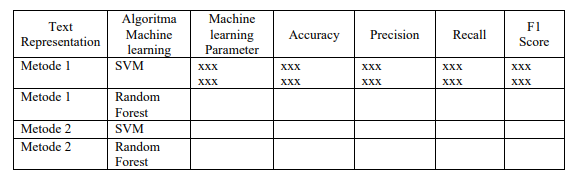

In [ ]:
result_dict = {
    'Text Representation': ['TF-IDF',
                            'TF-IDF',
                            'Word2Vec (Skipgram)',
                            'Word2Vec (skipgram)'],
    'Algoritma Machine Learning': ['SVM',
                                   'Random Forest',
                                   'SVM',
                                   'Random Forest'],
    'Machine Learning Parameter': [svm_tfidf_tuned.best_params_,
                                   rf_tfidf_tuned.best_params_,
                                   svm_w2v_tuned.best_params_,
                                   rf_w2v_tuned.best_params_],
    'Accuracy': [svm_tfidf_tuned_report.split()[25],
                 rf_tfidf_tuned_report.split()[25],
                 svm_w2v_tuned_report.split()[25],
                 rf_w2v_tuned_report.split()[25]],
    'Precision': [f'politik:  {svm_tfidf_tuned_report.split()[20]},\n'+
                  f'olahraga:{svm_tfidf_tuned_report.split()[15]},\n'+
                  f'bisnis: {svm_tfidf_tuned_report.split()[5]},\n'+
                  f'hiburan: {svm_tfidf_tuned_report.split()[10]},\n'+
                  f'macro: {svm_tfidf_tuned_report.split()[29]},\n'+
                  f'weighted:{svm_tfidf_tuned_report.split()[35]}',

                  f'politik:  {rf_tfidf_tuned_report.split()[20]},\n'+
                  f'olahraga:{rf_tfidf_tuned_report.split()[15]},\n'+
                  f'bisnis: {rf_tfidf_tuned_report.split()[5]},\n'+
                  f'hiburan: {rf_tfidf_tuned_report.split()[10]},\n'+
                  f'macro: {rf_tfidf_tuned_report.split()[29]},\n'+
                  f'weighted:{rf_tfidf_tuned_report.split()[35]}',

                  f'politik:  {svm_w2v_tuned_report.split()[20]},\n'+
                  f'olahraga:{svm_w2v_tuned_report.split()[15]},\n'+
                  f'bisnis: {svm_w2v_tuned_report.split()[5]},\n'+
                  f'hiburan: {svm_w2v_tuned_report.split()[10]},\n'+
                  f'macro: {svm_w2v_tuned_report.split()[29]},\n'+
                  f'weighted:{svm_w2v_tuned_report.split()[35]}',

                  f'politik:  {rf_w2v_tuned_report.split()[20]},\n'+
                  f'olahraga:{rf_w2v_tuned_report.split()[15]},\n'+
                  f'bisnis: {rf_w2v_tuned_report.split()[5]},\n'+
                  f'hiburan: {rf_w2v_tuned_report.split()[10]},\n'+
                  f'macro: {rf_w2v_tuned_report.split()[29]},\n'+
                  f'weighted:{rf_w2v_tuned_report.split()[35]}'],

    'Recall':    [f'politik:  {svm_tfidf_tuned_report.split()[21]},\n'+
                  f'olahraga:{svm_tfidf_tuned_report.split()[16]},\n'+
                  f'bisnis: {svm_tfidf_tuned_report.split()[6]},\n'+
                  f'hiburan: {svm_tfidf_tuned_report.split()[11]},\n'+
                  f'macro: {svm_tfidf_tuned_report.split()[30]},\n'+
                  f'weighted:{svm_tfidf_tuned_report.split()[36]}',

                  f'politik:  {rf_tfidf_tuned_report.split()[21]},\n'+
                  f'olahraga:{rf_tfidf_tuned_report.split()[16]},\n'+
                  f'bisnis: {rf_tfidf_tuned_report.split()[6]},\n'+
                  f'hiburan: {rf_tfidf_tuned_report.split()[11]},\n'+
                  f'macro: {rf_tfidf_tuned_report.split()[30]},\n'+
                  f'weighted:{rf_tfidf_tuned_report.split()[36]}',

                  f'politik:  {svm_w2v_tuned_report.split()[21]},\n'+
                  f'olahraga:{svm_w2v_tuned_report.split()[16]},\n'+
                  f'bisnis: {svm_w2v_tuned_report.split()[6]},\n'+
                  f'hiburan: {svm_w2v_tuned_report.split()[11]},\n'+
                  f'macro: {svm_w2v_tuned_report.split()[30]},\n'+
                  f'weighted:{svm_w2v_tuned_report.split()[36]}',

                  f'politik:  {rf_w2v_tuned_report.split()[21]},\n'+
                  f'olahraga:{rf_w2v_tuned_report.split()[16]},\n'+
                  f'bisnis: {rf_w2v_tuned_report.split()[6]},\n'+
                  f'hiburan: {rf_w2v_tuned_report.split()[11]},\n'+
                  f'macro: {rf_w2v_tuned_report.split()[30]},\n'+
                  f'weighted:{rf_w2v_tuned_report.split()[36]}'],

    'F1 Score': [f'politik:  {svm_tfidf_tuned_report.split()[22]},\n'+
                  f'olahraga:{svm_tfidf_tuned_report.split()[17]},\n'+
                  f'bisnis: {svm_tfidf_tuned_report.split()[7]},\n'+
                  f'hiburan: {svm_tfidf_tuned_report.split()[12]},\n'+
                  f'macro: {svm_tfidf_tuned_report.split()[31]},\n'+
                  f'weighted:{svm_tfidf_tuned_report.split()[37]}',

                  f'politik:  {rf_tfidf_tuned_report.split()[22]},\n'+
                  f'olahraga:{rf_tfidf_tuned_report.split()[17]},\n'+
                  f'bisnis: {rf_tfidf_tuned_report.split()[7]},\n'+
                  f'hiburan: {rf_tfidf_tuned_report.split()[12]},\n'+
                  f'macro: {rf_tfidf_tuned_report.split()[31]},\n'+
                  f'weighted:{rf_tfidf_tuned_report.split()[37]}',

                  f'politik:  {svm_w2v_tuned_report.split()[22]},\n'+
                  f'olahraga:{svm_w2v_tuned_report.split()[17]},\n'+
                  f'bisnis: {svm_w2v_tuned_report.split()[7]},\n'+
                  f'hiburan: {svm_w2v_tuned_report.split()[12]},\n'+
                  f'macro: {svm_w2v_tuned_report.split()[31]},\n'+
                  f'weighted:{svm_w2v_tuned_report.split()[37]}',

                  f'politik:  {rf_w2v_tuned_report.split()[22]},\n'+
                  f'olahraga:{rf_w2v_tuned_report.split()[17]},\n'+
                  f'bisnis: {rf_w2v_tuned_report.split()[7]},\n'+
                  f'hiburan: {rf_w2v_tuned_report.split()[12]},\n'+
                  f'macro: {rf_w2v_tuned_report.split()[31]},\n'+
                  f'weighted:{rf_w2v_tuned_report.split()[37]}']
}

result_df = pd.DataFrame(result_dict)
result_df

,Text Representation,Algoritma Machine Learning,Machine Learning Parameter,Accuracy,Precision,Recall,F1 Score
0,TF-IDF,SVM,"{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.85,"politik: 0.67,\nolahraga:1.00,\nbisnis: 0.93,...","politik: 0.67,\nolahraga:1.00,\nbisnis: 0.93,...","politik: 0.67,\nolahraga:1.00,\nbisnis: 0.93,..."
1,TF-IDF,Random Forest,"{'min_samples_leaf': 1, 'min_samples_split': 2...",0.88,"politik: 0.75,\nolahraga:0.89,\nbisnis: 0.87,...","politik: 0.67,\nolahraga:1.00,\nbisnis: 0.93,...","politik: 0.71,\nolahraga:0.94,\nbisnis: 0.90,..."
2,Word2Vec (Skipgram),SVM,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.88,"politik: 0.70,\nolahraga:1.00,\nbisnis: 0.93,...","politik: 0.78,\nolahraga:1.00,\nbisnis: 1.00,...","politik: 0.74,\nolahraga:1.00,\nbisnis: 0.97,..."
3,Word2Vec (skipgram),Random Forest,"{'min_samples_leaf': 4, 'min_samples_split': 2...",0.90,"politik: 0.86,\nolahraga:0.89,\nbisnis: 0.93,...","politik: 0.67,\nolahraga:1.00,\nbisnis: 1.00,...","politik: 0.75,\nolahraga:0.94,\nbisnis: 0.97,..."


Berdasarkan hasil perbandingan dua model, SVM dan random forest, dengan dua text representation, TF-IDF dan Word2Vec, pada table diatas bisa dilihat (berdasarkan akurasi) bahwa SVM dengan TF-IDF mendapatkan hasil yang paling bagus, sedangkan Random Forest dengan TF-IDF mendapatkan hasil yang paling buruk.

Selain itu, performa SVM dengan TF-IDf lebih bagus dibandingkan dengan Word2Vec. Sebaliknya, performa random forest dengan TF-IDf lebih jelek dibandingkan dengan Word2Vec.
Hasil ini menunjukkan bahwa TF-IDF lebih cocok digunakan pada model SVM dan Word2Vec lebih cocok digunakan pada model random forest.

Saya menduga hal ini disebakankan karena karakteristik dari TF-IDF yang mencari relation dari frekuensi kata dalam set dokumen sehingga SVM yang berfokus pada bagaimana memiskahkan suatu data secara linear bisa dapat mengkategorikan teks-teks berita tersebut dengan lebih baik. Sedangkan karakteristik dari Word2Vec ini sendiri adalah mencari konteks dan makna semantik dari kata-kata yang berdekatan, sehingga lebih cocok pada model random forest yang memisahkan data berdasarkan seberapa baik setiap fitur bisa memisahkan data.

Disini, Kita juga bisa melihat hal menarik dimana setiap model mampu memprediksi berita olahraga dengan sangat baik, yang bisa dilihat bahwa untuk setiap nilai precision, recall, dan f1-score untuk semua model adalah 1.00, kecuali SVM-Word2Vec, yaitu 0.92. Hal ini mungkin karena ada istilah-istilah tertentu yang hanya ditemukan pada berita olah raga saja, misalnya bola, basket, dan lain-lain.

In [ ]:
print(rf_w2v_tuned_report)

              precision    recall  f1-score   support

      bisnis       0.93      1.00      0.97        14
     hiburan       0.90      0.90      0.90        10
    olahraga       0.89      1.00      0.94         8
     politik       0.86      0.67      0.75         9

    accuracy                           0.90        41
   macro avg       0.89      0.89      0.89        41
weighted avg       0.90      0.90      0.90        41



In [ ]:
for i, j in enumerate(svm_tfidf_tuned_report.split()):
  print(f'{i}. {j}')

0. precision
1. recall
2. f1-score
3. support
4. bisnis
5. 0.93
6. 0.93
7. 0.93
8. 14
9. hiburan
10. 0.80
11. 0.80
12. 0.80
13. 10
14. olahraga
15. 1.00
16. 1.00
17. 1.00
18. 8
19. politik
20. 0.67
21. 0.67
22. 0.67
23. 9
24. accuracy
25. 0.85
26. 41
27. macro
28. avg
29. 0.85
30. 0.85
31. 0.85
32. 41
33. weighted
34. avg
35. 0.85
36. 0.85
37. 0.85
38. 41
